In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/preprocessed_data.csv')

In [ ]:
df_new= df[df['month'].isin([1,2,3,4,5,6])]

In [ ]:
df_new.shape

(860347, 7)

In [ ]:
df_new.head(2)

,time_category_encoded,month,day,PULocationID,DOLocationID,trip_distance,total_amount
0,1,1,1,238,151,0.7,8.5
1,1,1,1,79,263,4.1,18.3


In [ ]:
df_new.drop('time_category_encoded', axis=1, inplace=True)

/tmp/ipython-input-3933126427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop('time_category_encoded', axis=1, inplace=True)


In [ ]:
df_new.head()

,month,day,PULocationID,DOLocationID,trip_distance,total_amount
0,1,1,238,151,0.7,8.50
1,1,1,79,263,4.1,18.30
2,1,1,107,229,1.7,11.80
3,1,1,142,238,1.8,12.95
4,1,1,140,262,1.0,7.82


In [ ]:
df_new.isnull().sum()

,0
month,0
day,0
PULocationID,0
DOLocationID,0
trip_distance,0
total_amount,0


In [ ]:
y=df_new['total_amount']
x=df_new.drop(columns=['total_amount'])

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,random_state=7)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(645260, 5)
(645260,)
(215087, 5)
(215087,)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initialize the model
dt_regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
#Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
#Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
#Best model & predictions
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(x_test)

In [ ]:
 #Evaluation
print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
R2 Score: 0.9015808449813263
Mean Squared Error: 17.932258208932396


In [ ]:
 #Evaluate overfitting/underfitting
print("\nTraining R² Score:", r2_score(y_train, y_train))
print("Testing R² Score:", r2_score(y_test, y_test))
print("Training MSE:", mean_squared_error(y_train, y_train))
print("Testing MSE:", mean_squared_error(y_test, y_test))


Training R² Score: 1.0
Testing R² Score: 1.0
Training MSE: 0.0
Testing MSE: 0.0


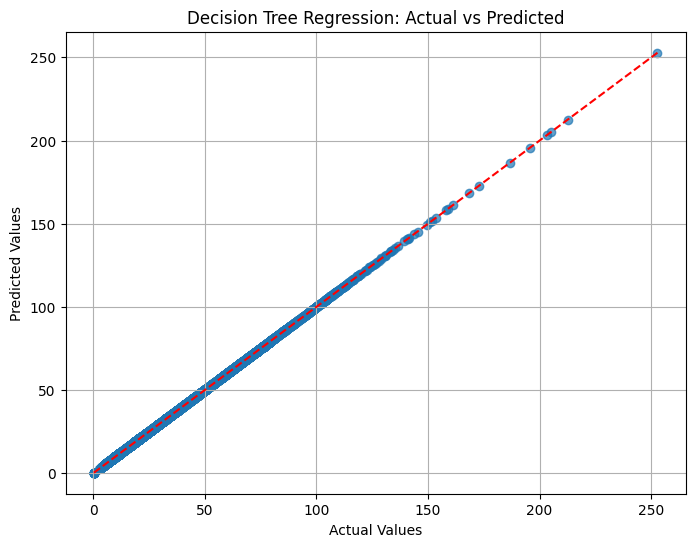

In [ ]:
#Scatter plot (Actual vs Predicted on Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [63]:
# Pickle
import joblib
joblib.dump(best_dt_model, 'decision_tree_model.pkl')
print("Saved tuned model: decision_tree_model.pkl")

Saved tuned model: decision_tree_model.pkl
